In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


# In this data set we have to predict a personal details survived or not in Titanic sink

In [2]:
df=pd.read_csv('/kaggle/input/test-file/tested.csv')

> **How big the data is?**

In [3]:
df.shape

(418, 12)

> **How does the data look like?**

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#if I can watch sample data we use
df.sample(5) #randomly 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
182,1074,1,1,"Marvin, Mrs. Daniel Warner (Mary Graham Carmic...",female,18.0,1,0,113773,53.1000,D30,S
75,967,0,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5000,C132,C
15,907,1,2,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24.0,1,0,SC/PARIS 2167,27.7208,NaN,C
13,905,0,2,"Howard, Mr. Benjamin",male,63.0,1,0,24065,26.0000,NaN,S
284,1176,1,3,"Rosblom, Miss. Salli Helena",female,2.0,1,1,370129,20.2125,NaN,S


> **what is the type of columns?**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


> **Are there any missing values?**

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

>**How does the data look mathematically?** 

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


> **Are there any duplicated rows?**

In [9]:
df.duplicated().sum()

0

> **How is the correlation b/w columns, if there is no role of any col in output then we can remove that col**

In [10]:
# df.corr() [we can not do this as we have categorical column, so we have to change it into numerical data]
# bellow we change categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['Embarked'])
label

array([1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 1, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2,
       1, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2, 1, 0, 1, 2,
       1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 2,
       0, 1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 1, 2, 2, 1, 2, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2,
       2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2,

In [11]:
df.drop("Embarked", axis=1, inplace=True)
df["Embarked"]=label
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,2
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,2
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,2


In [12]:
df1=df.drop(columns=['Name','Sex','Cabin','Ticket'])
df1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,34.5,0,0,7.8292,1
1,893,1,3,47.0,1,0,7.0000,2
2,894,0,2,62.0,0,0,9.6875,1
3,895,0,3,27.0,0,0,8.6625,2
4,896,1,3,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,1305,0,3,NaN,0,0,8.0500,2
414,1306,1,1,39.0,0,0,108.9000,0
415,1307,0,3,38.5,0,0,7.2500,2
416,1308,0,3,NaN,0,0,8.0500,2


In [13]:
df1.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211,0.040699
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514,-0.076281
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147,0.227983
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932,-0.175848
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539,0.052708
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046,0.054577
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000,-0.257183
Embarked,0.040699,-0.076281,0.227983,-0.175848,0.052708,0.054577,-0.257183,1.000000


In [14]:
#output column is 'Survived'
df1.corr()['Survived']

PassengerId   -0.023245
Survived       1.000000
Pclass        -0.108615
Age           -0.000013
SibSp          0.099943
Parch          0.159120
Fare           0.191514
Embarked      -0.076281
Name: Survived, dtype: float64

> **EDA (Univariate analysis)**

**1. Categorical data**

> Bar chart

<Axes: xlabel='Survived'>

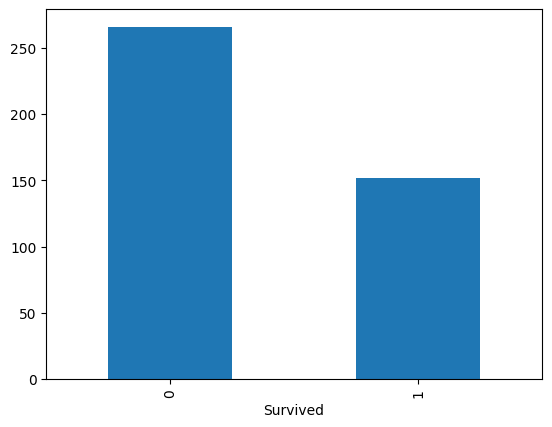

In [15]:
df['Survived'].value_counts().plot(kind='bar') #0-> not survived , 1->survived

<Axes: xlabel='Pclass'>

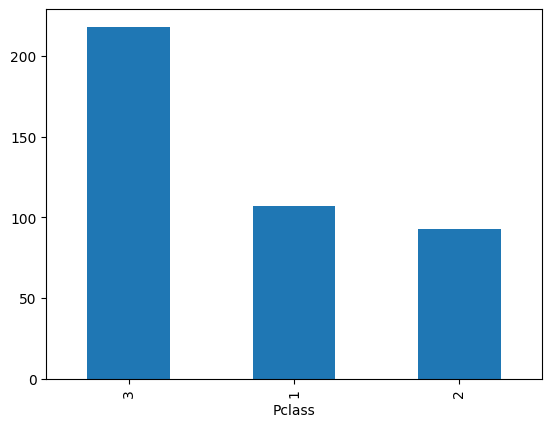

In [16]:
df['Pclass'].value_counts().plot(kind='bar')

In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Sex'>

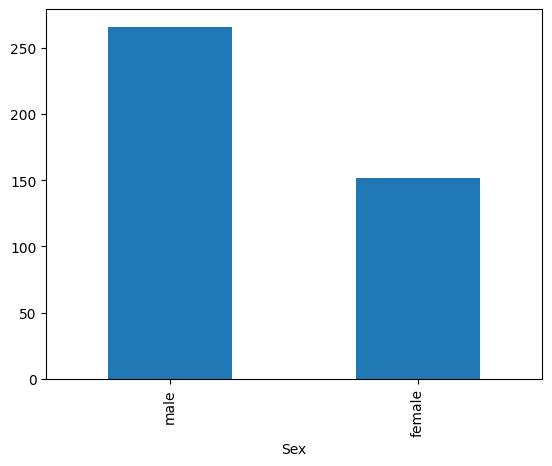

In [18]:
df['Sex'].value_counts().plot(kind='bar')

<Axes: xlabel='Embarked'>

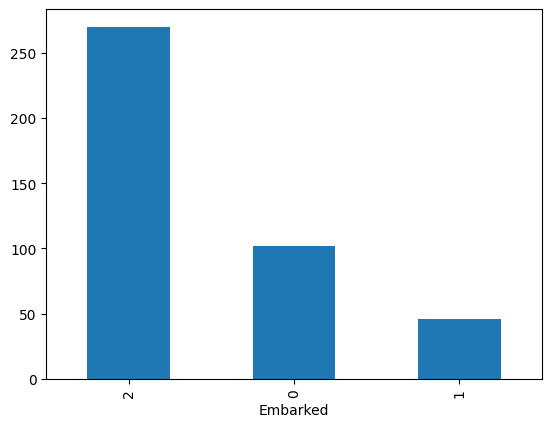

In [19]:
df['Embarked'].value_counts().plot(kind='bar')

> **Pie chart**

<Axes: ylabel='count'>

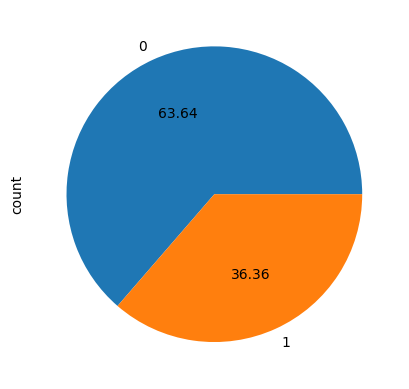

In [20]:
df['Survived'].value_counts().plot(kind='pie',autopct='%.2f') #0-> not survived , 1->survived

<Axes: ylabel='count'>

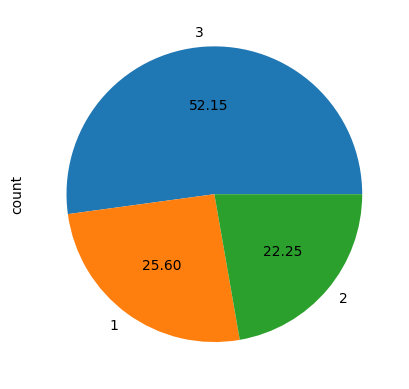

In [21]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

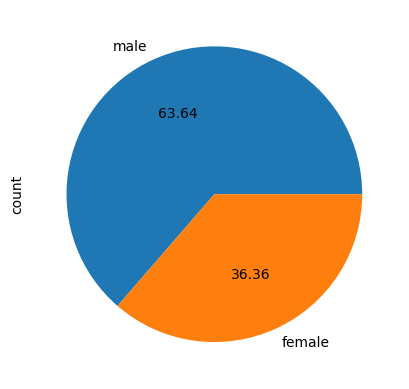

In [22]:
df['Sex'].value_counts().plot(kind='pie',autopct='%.2f')

**2. Numerical Data**

> **Histogram**

In [23]:
import matplotlib.pyplot as plt

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,2
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,2


(array([11.,  5.,  7.,  9., 29., 42., 52., 45., 21., 22., 18., 19., 16.,
         9., 11.,  6.,  8.,  1.,  0.,  1.]),
 array([ 0.17  ,  3.9615,  7.753 , 11.5445, 15.336 , 19.1275, 22.919 ,
        26.7105, 30.502 , 34.2935, 38.085 , 41.8765, 45.668 , 49.4595,
        53.251 , 57.0425, 60.834 , 64.6255, 68.417 , 72.2085, 76.    ]),
 <BarContainer object of 20 artists>)

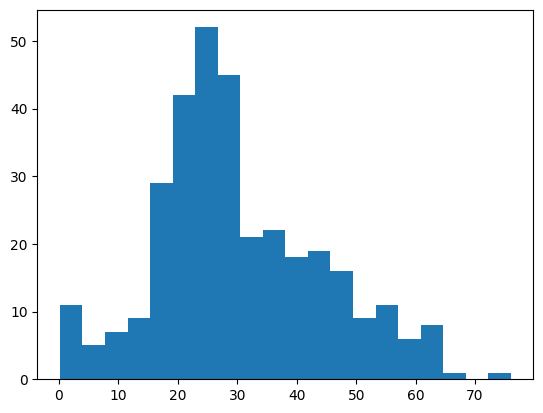

In [25]:
plt.hist(df['Age'],bins=20)

> **Distplot**

*This actually gives the probability density function ,y axis probability, so p( any random person to age be 40 )= value corresponding to x=40 in intersection of the curve and histogram*

/tmp/ipykernel_18/2900341866.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],bins=20)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

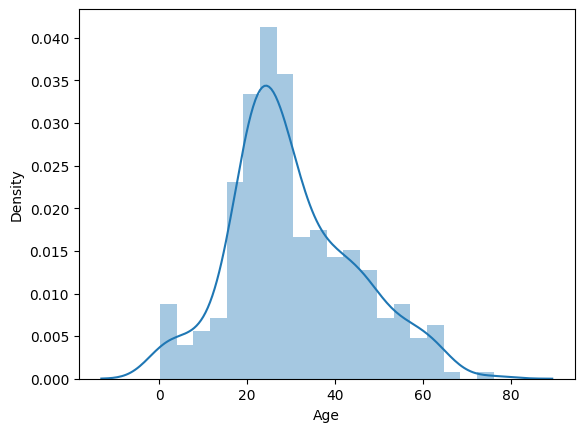

In [26]:
sns.distplot(df['Age'],bins=20)

> **Boxplot**

<Axes: >

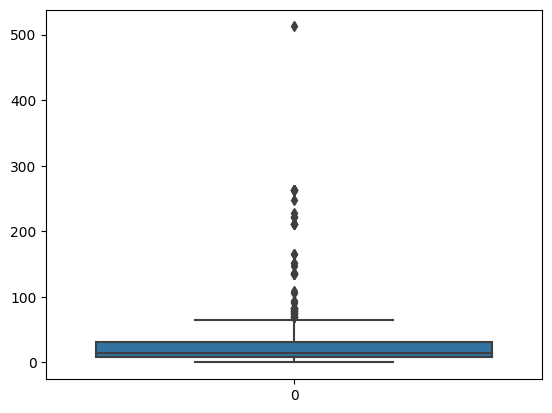

In [27]:
sns.boxplot(df['Fare'])